In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Preprocessed.csv')

In [3]:
dataset

,Unnamed: 0,age,bmi,charges,smoker_yes
0,0,19,27.900,16884.92400,1
1,1,18,33.770,1725.55230,0
2,2,28,33.000,4449.46200,0
3,3,33,22.705,21984.47061,0
4,4,32,28.880,3866.85520,0
...,...,...,...,...,...
1333,1333,50,30.970,10600.54830,0
1334,1334,18,31.920,2205.98080,0
1335,1335,18,36.850,1629.83350,0
1336,1336,21,25.800,2007.94500,0


In [4]:
dataset.isnull().sum()

Unnamed: 0    0
age           0
bmi           0
charges       0
smoker_yes    0
dtype: int64

In [5]:
dataset.cov()

,Unnamed: 0,age,bmi,charges,smoker_yes
Unnamed: 0,149298.500000,-170.829095,-85.224706,-1.578122e+04,0.813762
age,-170.829095,197.401387,9.362337,5.087480e+04,-0.141903
bmi,-85.224706,9.362337,37.187884,1.464730e+04,0.009233
charges,-15781.223645,50874.802298,14647.304426,1.466524e+08,3848.667032
smoker_yes,0.813762,-0.141903,0.009233,3.848667e+03,0.162969


In [6]:
# the covariance between bmi and age is 9.36. So it is a positive variance.
#the covariance between age and charges is 5.08. So it is apositive variance.

In [7]:
dataset.corr()

,Unnamed: 0,age,bmi,charges,smoker_yes
Unnamed: 0,1.000000,-0.031467,-0.036169,-0.003373,0.005217
age,-0.031467,1.000000,0.109272,0.299008,-0.025019
bmi,-0.036169,0.109272,1.000000,0.198341,0.003750
charges,-0.003373,0.299008,0.198341,1.000000,0.787251
smoker_yes,0.005217,-0.025019,0.003750,0.787251,1.000000


In [8]:
#The correlation between age and bmi is 0.109. So it is apositive correlation.

### Multi-Colinear

In [9]:
dataset.drop("Unnamed: 0",inplace=True,axis=1)

In [10]:
dataset

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0
...,...,...,...,...
1333,50,30.970,10600.54830,0
1334,18,31.920,2205.98080,0
1335,18,36.850,1629.83350,0
1336,21,25.800,2007.94500,0


In [11]:
import seaborn as sns

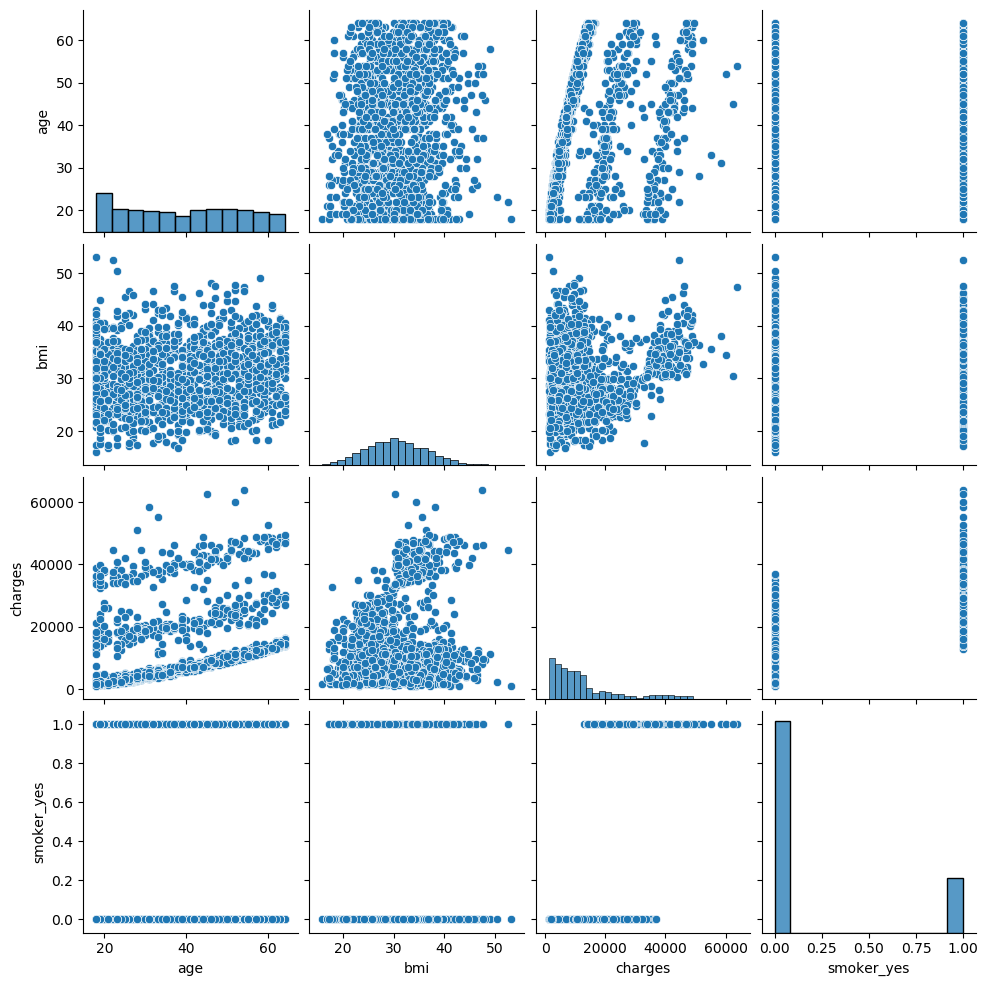

In [12]:
sns.pairplot(dataset)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

1. imports the variance_inflation_factor() function from the statsmodels.stats.outliers_influence module
2. creates a new dataframe called vif. 
3. dataframe will have two columns: variables and VIF
4. variable names are taken from the columns attribute of the input dataframe.
5. calculates the VIF for each variable in the input dataframe using the variance_inflation_factor() function. The VIF is calculated for each variable by dividing the variance of the variable by the variance of the least squares multiple regression of the variable on all other variables.
6. The VIF values are appended to the vif dataframe.
7. put in functions.

In [14]:
calc_vif(dataset[["age","bmi","charges","smoker_yes"]])

,variables,VIF
0,age,9.132227
1,bmi,7.694165
2,charges,7.810720
3,smoker_yes,3.943513


In [15]:
calc_vif(dataset[["age","bmi"]])

,variables,VIF
0,age,7.457006
1,bmi,7.457006


Other ways to handle multicollinearity in a dataset:

Dropping one of the correlated variables: If there are two or more highly correlated variables, it may be beneficial to remove one of them from the analysis.

Feature scaling: Multicollinearity can occur due to different scales of the variables. Feature scaling techniques such as normalization and standardization can be applied to ensure all variables are on the same scale.

Regularization: Regularization techniques such as Ridge and Lasso regression can be used to handle multicollinearity. These techniques add a penalty term to the loss function, which shrinks the coefficient estimates of the variables towards zero, effectively reducing their impact on the model.

Principal Component Analysis (PCA): PCA is a technique that reduces the dimensionality of the dataset by transforming the original variables into a smaller set of uncorrelated variables, called principal components. This can help to eliminate multicollinearity by creating new variables that are orthogonal to each other.

Using a different model: In some cases, multicollinearity may be a problem with a specific model. Switching to a different model may be an option to handle this issue. For example, decision trees or random forests can handle multicollinearity better than linear regression.

## Homoscedasticity and hetroscedasticity

Homoscedasticity and heteroscedasticity are important concepts in statistics and regression analysis, as they help to assess the reliability of a regression model and its predictions.

Homoscedasticity refers to the assumption that the variance of the residuals (the difference between the predicted and actual values) is constant across all levels of the predictor variables. In other words, the spread of the residuals is the same throughout the range of the predictor variables. Homoscedasticity is important because it indicates that the variance of the residuals is not dependent on the values of the predictor variables, which means that the regression model is reliable and the predictions are unbiased.

Heteroscedasticity, on the other hand, occurs when the variance of the residuals is not constant across all levels of the predictor variables. This can cause problems in the regression analysis, as the variance of the residuals is dependent on the values of the predictor variables, which means that the regression model is unreliable and the predictions are biased. Heteroscedasticity can lead to incorrect estimates of the standard errors of the regression coefficients, which can result in incorrect inferences about the significance of the coefficients and the overall model fit.

Therefore, it is important to check for homoscedasticity and heteroscedasticity in regression analysis, as these can affect the reliability and accuracy of the results. If heteroscedasticity is detected, it may be necessary to use different modeling techniques or to transform the data to correct the problem.

In [16]:
# T Test

In [17]:
df=pd.read_csv('insurance.csv')

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
df.drop(['sex','children','region'],axis=1,inplace=True)

In [20]:
df

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


In [21]:
#Independant Sample - Unpaired T Test
#Different group (yes,no) but same condition (charges)
#group always in categorical data
#condition always in numerical data

In [22]:
from scipy.stats import ttest_ind
yes=df[df["smoker"]=="yes"]["charges"]
no=df[df["smoker"]=="no"]["charges"]
ttest_ind(yes,no)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [23]:
#Dependant Sample - paired T Test
#same group (yes) but different condition (charges,bmi)

In [24]:
from scipy.stats import ttest_rel
yes=df[df["smoker"]=="yes"]["charges"]
yes1=df[df["smoker"]=="yes"]["bmi"]
ttest_rel(yes,yes1)

Ttest_relResult(statistic=45.94284488381625, pvalue=1.7779044393550859e-130)

In [25]:
#Hypothesis Testing
      #Null Hypothesis
      #Alternate Hypothesis

In [26]:
#statement : Test whether charges of smoker-yes and bmi of smoker-yes is same ?

In [27]:
#Null Hypothesis : There is no similarity charges of smoker-yes and bmi of smoker-yes

In [28]:
#reject null hypothesis P<0.05
#accept null hypothesis P>0.05

# Analysis of variance - ANOVA

In [29]:
#One way of ANOVA

In [30]:
import scipy.stats as stats
stats.f_oneway(df["age"],df["bmi"],df["charges"])

F_onewayResult(statistic=1598.2559038458448, pvalue=0.0)

In [31]:
#Two way of ANOVA

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
formula = 'charges ~ C(smoker) + C(age) + C(smoker):C(age)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [34]:
anova_table

,sum_sq,df,F,PR(>F)
C(smoker),1.192054e+11,1.0,3059.956164,0.000000e+00
C(age),2.197363e+10,46.0,12.262059,3.057333e-72
C(smoker):C(age),4.118730e+09,46.0,2.298396,2.774934e-06
Residual,4.846196e+10,1244.0,NaN,NaN


formula = 'charges ~ C(smoker) + C(age) + C(smoker):C(age)': This line defines the formula for the ANOVA analysis. The dependent variable is degree_p, and the independent variables are gender, hsc_s, and the interaction between gender and hsc_s. The C() function is used to specify that the variables should be treated as categorical.

model = ols(formula, data=dataset).fit(): This line fits the ANOVA model using the specified formula and the provided dataset. The ols() function performs ordinary least squares regression, and the .fit() method is called to estimate the model parameters.

anova_table = sm.stats.anova_lm(model, typ=2): This line computes the ANOVA table using the fitted model. The anova_lm() function calculates the sums of squares, degrees of freedom, F-statistic, and p-values for each term in the model.